<div style="background-color:#3b5d91; color:#f7faff; padding:30px; border-radius:50px; max-width:1000px; margin:right;">

# Model Evaluation

</div>


<div style="background-color:#ddecfc; color:#100; background-color:#eaf4ff; color:#111; padding:30px; border-radius:50px; max-width:1000px; margin:right;">

<font color = Navy>

Final Model Evaluaiton on Test set.

- Train vs Test
- (Train+Dev) vs Test

</br>
</font>
</div>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_curve, auc
import pickle
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier


import os

In [8]:
with open("model_data_splits_balanced.pkl", "rb") as f:
    data = pickle.load(f)

# Extract
X_train_selected = data["X_train_selected"]
X_dev_selected   = data["X_dev_selected"]
X_test_selected  = data["X_test_selected"]
y_train          = data["y_train"]
y_dev            = data["y_dev"]
y_test           = data["y_test"]
X_train_balanced = data["X_train_balanced"]
y_train_balanced = data["y_train_balanced"]
selected_features= data["selected_features"]

print("✅ Data loaded for evaluation!")


✅ Data loaded for evaluation!


In [29]:
with open("xgb_best_model.pkl", "rb") as f:
    model = pickle.load(f)
print("Model loaded successfully.")


Model loaded successfully.


In [20]:
# --- Step 3: Evaluate on the Test Set ---

# --- Predictions ---
y_pred_test = model.predict(X_test_selected)
y_proba_test = model.predict_proba(X_test_selected)[:, 1]

# --- Metrics ---
acc = accuracy_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test)
rec = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
auc = roc_auc_score(y_test, y_proba_test)

print("📊 Test Set Performance:")
print(f"Accuracy:  {acc:.6f}")
print(f"Precision: {prec:.6f}")
print(f"Recall:    {rec:.6f}")
print(f"F1 Score:  {f1:.6f}")
print(f"AUC:       {auc:.6f}")



📊 Test Set Performance:
Accuracy:  0.999062
Precision: 0.930864
Recall:    0.893365
F1 Score:  0.911729
AUC:       0.993962


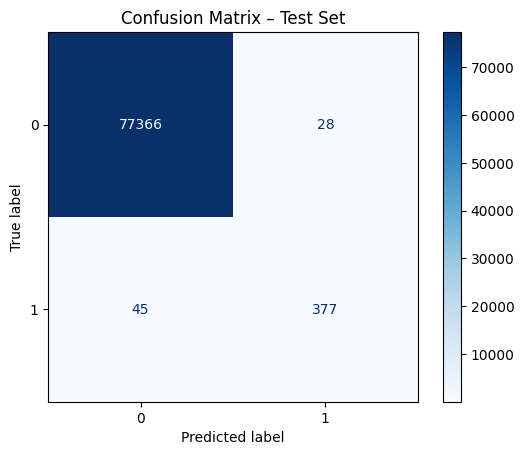

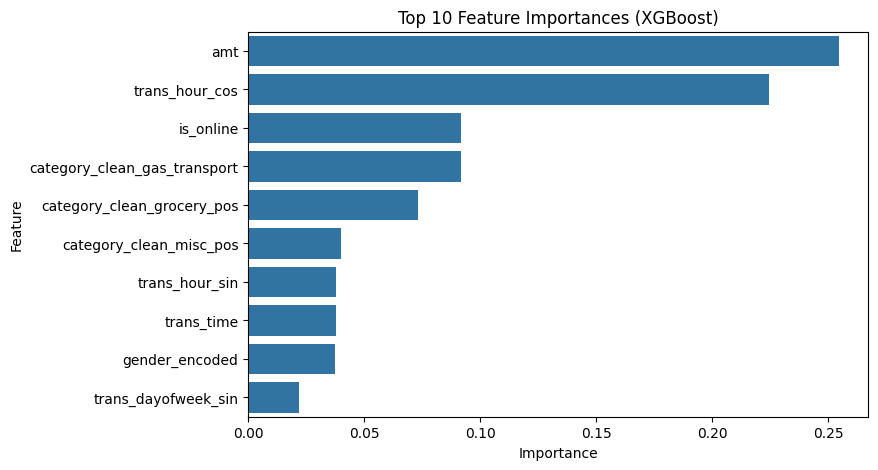

In [35]:
# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix – Test Set")
plt.show()


# --- Optional: Feature Importances ---
try:
    import pandas as pd
    importance = pd.DataFrame({
        'Feature': selected_features,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(8,5))
    sns.barplot(x='Importance', y='Feature', data=importance.head(10))
    plt.title("Top 10 Feature Importances (XGBoost)")
    plt.show()
except:
    print("⚠️ Feature importance not available for this model type.")


In [ ]:
# --- Step 1: Merge Train (balanced) and Dev ---

X_final_train = pd.concat([X_train_balanced, X_dev_selected], axis=0)
y_final_train = pd.concat([y_train_balanced, y_dev], axis=0)

print("✅ Combined Train+Dev shapes:")
print(f"X_final_train: {X_final_train.shape}, y_final_train: {y_final_train.shape}")

# --- Step 2: Recreate model with previous best params ---
params = model.get_params()
params.update({
    "random_state": 42,   # ensure reproducibility
    "n_jobs": -1          # utilize all cores for faster fitting
})

final_model = XGBClassifier(**params)

# --- Step 3: Train on full Train+Dev data ---
final_model.fit(X_final_train, y_final_train)
print("✅ Model retrained on Train+Dev set.")



✅ Combined Train+Dev shapes:
X_final_train: (800160, 18), y_final_train: (800160,)
✅ Model retrained on Train+Dev set.


In [36]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- Predictions on Test ---
y_pred_test_final = final_model.predict(X_test_selected)
y_proba_test_final = final_model.predict_proba(X_test_selected)[:, 1]

# --- Compute Metrics ---
acc_final = accuracy_score(y_test, y_pred_test_final)
prec_final = precision_score(y_test, y_pred_test_final)
rec_final = recall_score(y_test, y_pred_test_final)
f1_final = f1_score(y_test, y_pred_test_final)
auc_final = roc_auc_score(y_test, y_proba_test_final)

print("📊 Final Model (Train+Dev) — Test Set Performance:")
print(f"Accuracy:  {acc_final:.6f}")
print(f"Precision: {prec_final:.6f}")
print(f"Recall:    {rec_final:.6f}")
print(f"F1 Score:  {f1_final:.6f}")
print(f"AUC:       {auc_final:.6f}")


📊 Final Model (Train+Dev) — Test Set Performance:
Accuracy:  0.999100
Precision: 0.940000
Recall:    0.890995
F1 Score:  0.914842
AUC:       0.994775


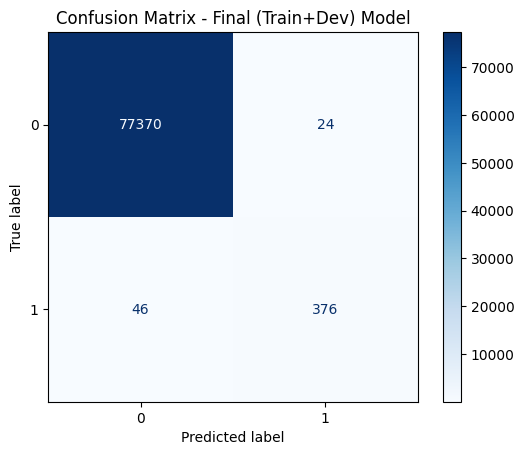

In [64]:
cm = confusion_matrix(y_test, y_pred_test_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Final (Train+Dev) Model")
plt.show()

# 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Grays_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'berlin', 'berlin_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_grey_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gist_yerg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'grey_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'managua', 'managua_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'vanimo', 'vanimo_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
# Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...

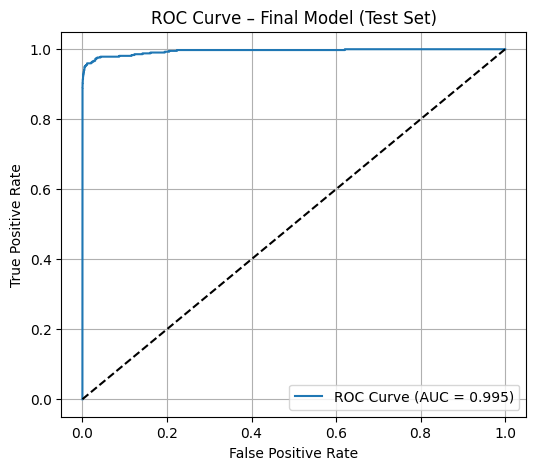

In [39]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_proba_test_final)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Final Model (Test Set)")
plt.legend()
plt.grid(True)
plt.show()


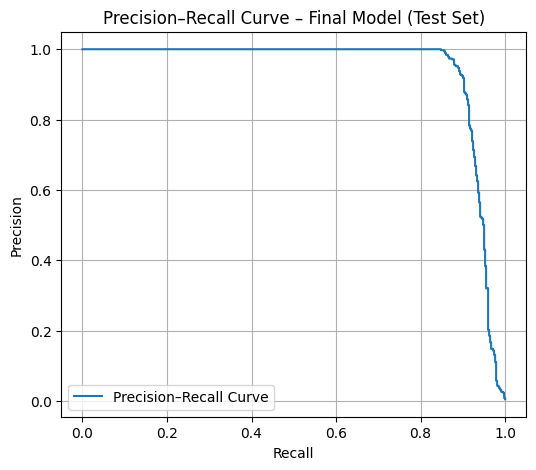

In [40]:
prec, rec, _ = precision_recall_curve(y_test, y_proba_test_final)
plt.figure(figsize=(6,5))
plt.plot(rec, prec, label="Precision–Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve – Final Model (Test Set)")
plt.legend()
plt.grid(True)
plt.show()


In [37]:
comparison_df = pd.DataFrame([
    ["Pre-Merge (Train only)", 0.999062, 0.930864, 0.893365, 0.911729, 0.993962],
    ["Final (Train+Dev)", acc_final, prec_final, rec_final, f1_final, auc_final]
], columns=["Model", "Accuracy", "Precision", "Recall", "F1", "AUC"])

print("\n📊 Comparison: Pre-Merge vs Final Model")
print(comparison_df.to_string(index=False))



📊 Comparison: Pre-Merge vs Final Model
                 Model  Accuracy  Precision   Recall       F1      AUC
Pre-Merge (Train only)  0.999062   0.930864 0.893365 0.911729 0.993962
     Final (Train+Dev)  0.999100   0.940000 0.890995 0.914842 0.994775


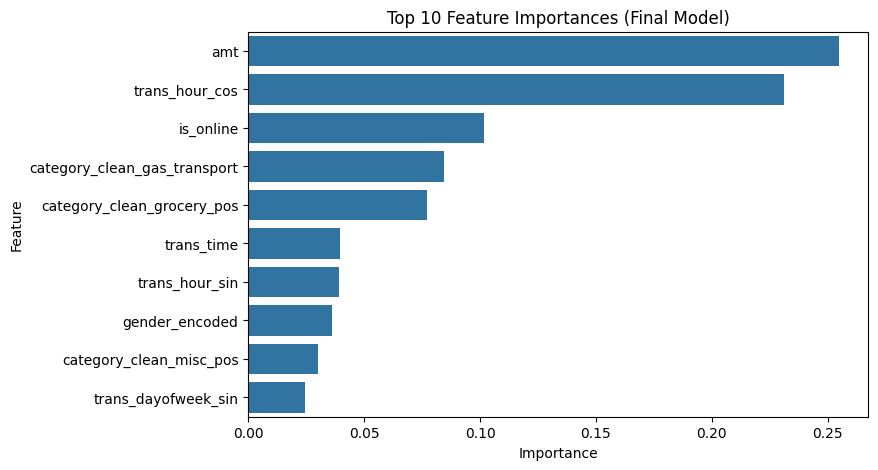

In [42]:
importance = pd.DataFrame({
    "Feature": selected_features,
    "Importance": final_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=importance.head(10))
plt.title("Top 10 Feature Importances (Final Model)")
plt.show()


In [ ]:
# --- Step 4: Save final model ---
import pickle
with open("xgb_final_model_train_dev.pkl", "wb") as f:
    pickle.dump(final_model, f)

print("Final model saved successfully as 'xgb_final_model_train_dev.pkl'")